### Determining Sample Size

In [1]:
def sample_size_calc(prop, d_min, power=0.8, alpha=0.05, type='absolute', figure='True'):
    size = sample_size(prop, d_min, power, alpha, type)
    if(figure=='True'):
        plot(prop, d_min, power, alpha, type)
    return size

In [2]:
def sample_size(prop, d_min, power=0.8, alpha=0.05, type='absolute'):
    from scipy.stats import norm
    import math
    if (type=='absolute'):
        d = d_min
    elif (type=='relative'):
        d=d_min*prop
    
    s = abs(norm.ppf(power))+norm.ppf(1-(alpha/2))
    size = prop*(1-prop)*2/((d/s)**2)
    
    return int(math.ceil(size))
        
        

In [3]:
def plot(prop, d_min, power=0.8, alpha=0.05, type='absolute'):
    import math
    from scipy import stats
    %matplotlib inline
    mean1=prop
    size=sample_size(prop, d_min, power, alpha, type)
    se =  math.sqrt(prop*(1-prop)*2/size)
    sd1=se
    sd2=se
    if (type=='absolute'):
        d = d_min
    elif (type=='relative'):
        d=d_min*prop
    mean2= mean1+d
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure(figsize=(14,5))
    
    initial_point1 = (sd1*stats.norm.ppf(0.0001)) + mean1
    inter1_1 = (sd1*stats.norm.ppf(alpha/2)) + mean1
    inter2_1 = (sd1*stats.norm.ppf(1-(alpha/2))) + mean1
    final_point1 = (sd1*stats.norm.ppf(0.9999)) + mean1
    
    initial_point2 = (sd2*stats.norm.ppf(0.0001)) + mean2
    inter1_2 = (sd2*stats.norm.ppf(alpha/2)) + mean2
    inter2_2 = (sd2*stats.norm.ppf(1-(alpha/2))) + mean2
    final_point2 = (sd2*stats.norm.ppf(0.9999)) + mean2
    
    y1=stats.norm.pdf(np.arange(initial_point1, inter1_1, 0.0001), loc=mean1, scale=sd1)
    
    plt.fill_between(x=np.arange(initial_point1, inter1_1, 0.0001),
                    y1=y1,
                    facecolor='red',
                    alpha=0.5)
    y2=stats.norm.pdf(np.arange(inter1_1, inter2_1, 0.0001), loc=mean1, scale=sd1)
    
    plt.fill_between(x=np.arange(inter1_1, inter2_1, 0.0001),
                    y1=y2,
                    facecolor='white',
                    alpha=0.5)
    
    y3=stats.norm.pdf(np.arange(inter2_1, final_point1, 0.0001), loc=mean1, scale=sd1)
    
    plt.fill_between(x=np.arange(inter2_1, final_point1, 0.0001),
                    y1=y3,
                    facecolor='red',
                    alpha=0.95)  
    
    y4=stats.norm.pdf(np.arange(initial_point2, inter2_1, 0.0001), loc=mean2, scale=sd2)
    
    plt.fill_between(x=np.arange(initial_point2, inter2_1, 0.0001),
                    y1=y4,
                    facecolor='blue',
                    alpha=0.5)  
    
    y5=stats.norm.pdf(np.arange(inter2_1, final_point2 , 0.0001), loc=mean2, scale=sd2)
    
    plt.fill_between(x=np.arange(inter2_1, final_point2, 0.0001),
                    y1=y5,
                    facecolor='green',
                    alpha=0.5)  
    
    power = 'Power = ' + str(round(1-stats.norm.cdf(inter2_1, loc=mean2, scale=sd2),2))
    type2 = 'Type II Error, Beta = ' + str(round(stats.norm.cdf(inter2_1, loc=mean2, scale=sd2),2))
    type1 =  'Type I Error, Alpha = ' + str(round(stats.norm.cdf(inter1_1, loc=mean1, scale=sd2) + 
                                            (1- stats.norm.cdf(inter2_1, loc=mean1, scale=sd2)),2)) 
    
    
    
    import matplotlib.patches as mpatches

    red_patch = mpatches.Patch(color='red', label=type1, alpha=0.5)
    blue_patch = mpatches.Patch(color='blue', label=type2, alpha=0.5)
    green_patch = mpatches.Patch(color='green', label=power, alpha=0.5)
    
    sample_size_text = 'Sample Size = ' + str(size)
    sample_size_patch = mpatches.Patch(color='green', label=sample_size_text, alpha=0)
    
    prop_text = 'Prop = ' + str(prop)
    d_text = 'D_Min = ' + str(d_min)
    
    prop_patch = mpatches.Patch(color='green', label=prop_text, alpha=0)
    d_patch = mpatches.Patch(color='green', label=d_text, alpha=0)
    
    first_legend=plt.legend(handles=[red_patch, blue_patch, green_patch], loc=1)
    ax = plt.gca().add_artist(first_legend)
    
    plt.legend(handles=[sample_size_patch, prop_patch, d_patch], loc=2)
    plt.show()
    

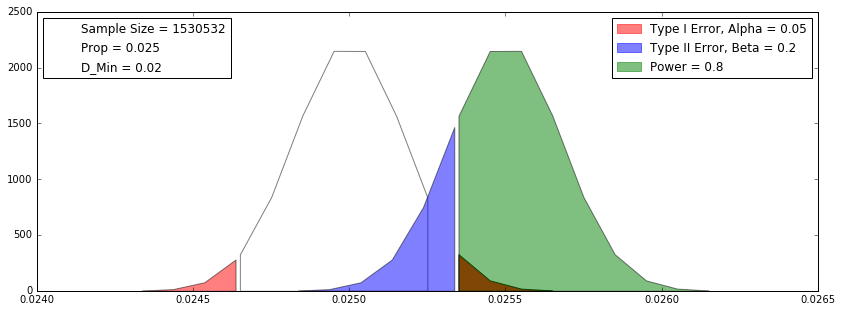

1530532

In [4]:
sample_size_calc(prop=0.025, d_min=0.02, type='relative')

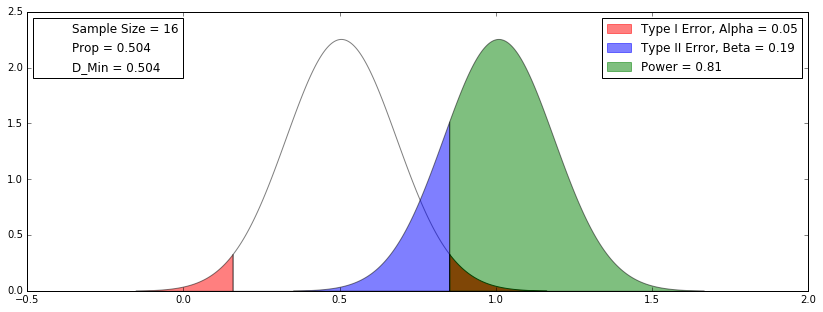

<function __main__.plot>

In [5]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

interact(plot, prop=(0.01, 1, 0.001), d_min=(0.01,1, 0.001), power=(0.001,0.999,0.01), alpha=(0.001,0.999,0.01))